# Exploratory Data Analysis - Sleep Deprivation & Cognitive Performance



### The following analysis uses the Kaggle dataset "Sleep Deprivation & Cognitive Performance" to explore possible correlations between   factors such as length and quality of sleep, caffein consumption, age, and others (predictors), and cognitive performance (outcome).


### The outcome is measured through the following tests:
### Stroop Task Reaction Time, N-Back Accuracy, and Psychomotor Vigilance Task (PVT) Reaction Time


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('project_1_data.csv')
df.head(10)

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14
5,P6,3.94,12,6,2.84,58.80,46,224.48,28,Male,32.23,3,6,29
6,P7,3.35,8,18,3.16,50.90,31,201.56,22,Male,32.74,4,5,16
7,P8,8.20,14,21,3.28,74.69,66,388.37,29,Male,32.25,1,0,4
8,P9,6.61,12,1,1.74,58.94,38,258.28,20,Female,25.24,3,4,28
9,P10,7.25,0,9,2.61,68.32,23,221.28,18,Male,21.78,3,4,3


In [11]:
df.shape

(60, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                60 non-null     float64
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        60 non-null     int64  
 9   Gender                     60 non-null     object 
 10  BMI                        60 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
d

In [19]:
df.duplicated().sum()

0

## Finding min/max age and gender counts

In [144]:
df['Age'].min()

18

In [146]:
df['Age'].max()

43

In [231]:
df['Gender'].value_counts()

Gender
Male      37
Female    23
Name: count, dtype: int64

## Statistics

In [49]:
df.describe()

,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.805500,8.316667,12.000000,3.245000,75.005833,38.1500,332.539000,29.516667,27.329333,2.383333,4.116667,17.866667
std,1.832357,5.637320,7.577845,0.827368,13.671457,17.1334,87.800288,8.168753,4.541382,1.688362,3.108717,11.015346
min,3.120000,0.000000,0.000000,1.600000,50.900000,10.0000,201.560000,18.000000,18.740000,0.000000,0.000000,0.000000
25%,4.107500,4.000000,6.000000,2.595000,64.620000,25.0000,257.535000,21.750000,23.580000,1.000000,1.000000,8.750000
50%,5.690000,8.000000,11.500000,3.260000,74.270000,37.0000,327.210000,28.500000,27.365000,2.500000,4.000000,17.500000
75%,7.285000,13.000000,19.000000,3.965000,85.600000,54.2500,402.845000,36.000000,30.747500,4.000000,6.000000,26.250000
max,8.820000,20.000000,24.000000,4.490000,99.730000,67.0000,494.550000,43.000000,34.930000,5.000000,10.000000,40.000000


In [21]:
df.columns

Index(['Participant_ID', 'Sleep_Hours', 'Sleep_Quality_Score',
       'Daytime_Sleepiness', 'Stroop_Task_Reaction_Time', 'N_Back_Accuracy',
       'Emotion_Regulation_Score', 'PVT_Reaction_Time', 'Age', 'Gender', 'BMI',
       'Caffeine_Intake', 'Physical_Activity_Level', 'Stress_Level'],
      dtype='object')

# Looking at the data

### Looking for a correlation between Sleep Hours, Sleep Quality, Daytime Sleepiness, Stress Level (as predictors) and the following outcomes:

## Outcome: Stroop Task Reaction Time

In [179]:
x = 'Stroop_Task_Reaction_Time'
y = ['Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness', 'Stress_Level'] 

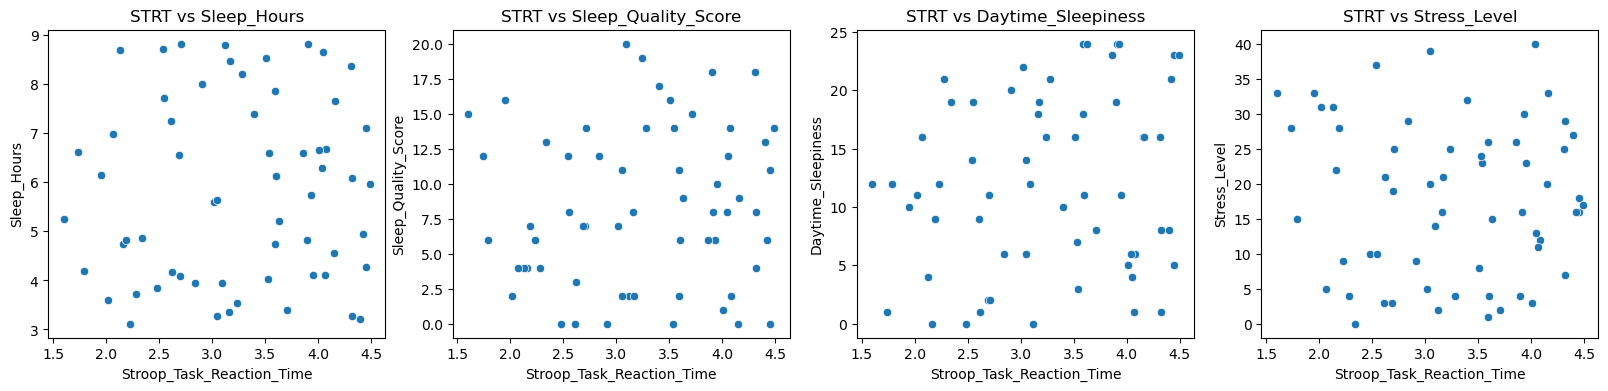

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=len(y), figsize=(5 * len(y), 4))

for i, y_ in enumerate(y):
    sns.scatterplot(data=df, x=x, y=y_, ax=axes[i])
    axes[i].set_title(f'STRT vs {y_}')

## Outcome: N-Back Accuracy

In [190]:
x = 'N_Back_Accuracy'
y = ['Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness', 'Stress_Level'] 

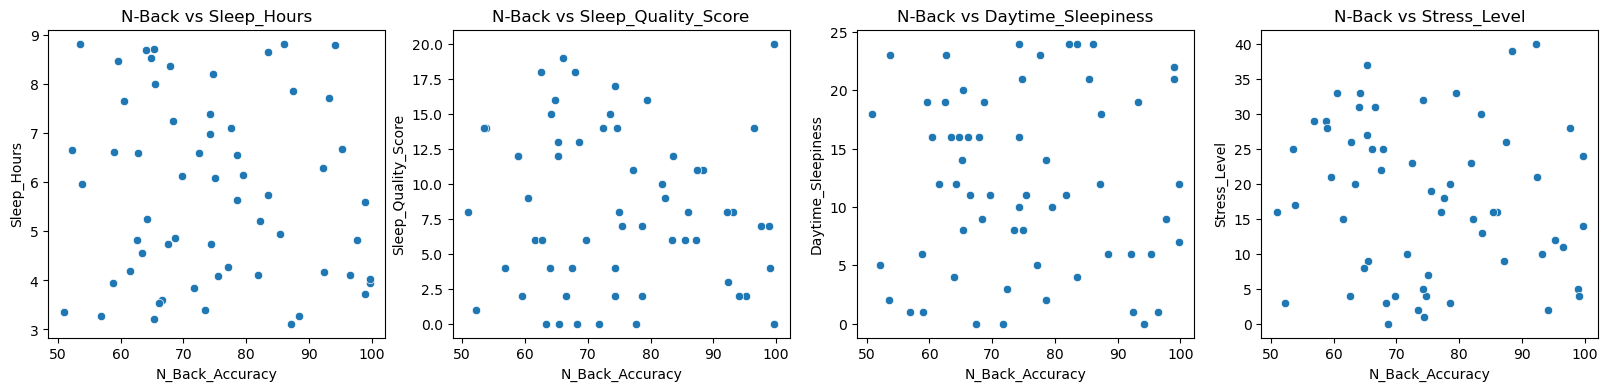

In [195]:
fig, axes = plt.subplots(nrows=1, ncols=len(y), figsize=(5 * len(y), 4))

for i, y_ in enumerate(y):
    sns.scatterplot(data=df, x=x, y=y_, ax=axes[i])
    axes[i].set_title(f'N-Back vs {y_}')

## Outcome: PVT Reaction Time

In [201]:
x = 'PVT_Reaction_Time'
y = ['Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness', 'Stress_Level'] 

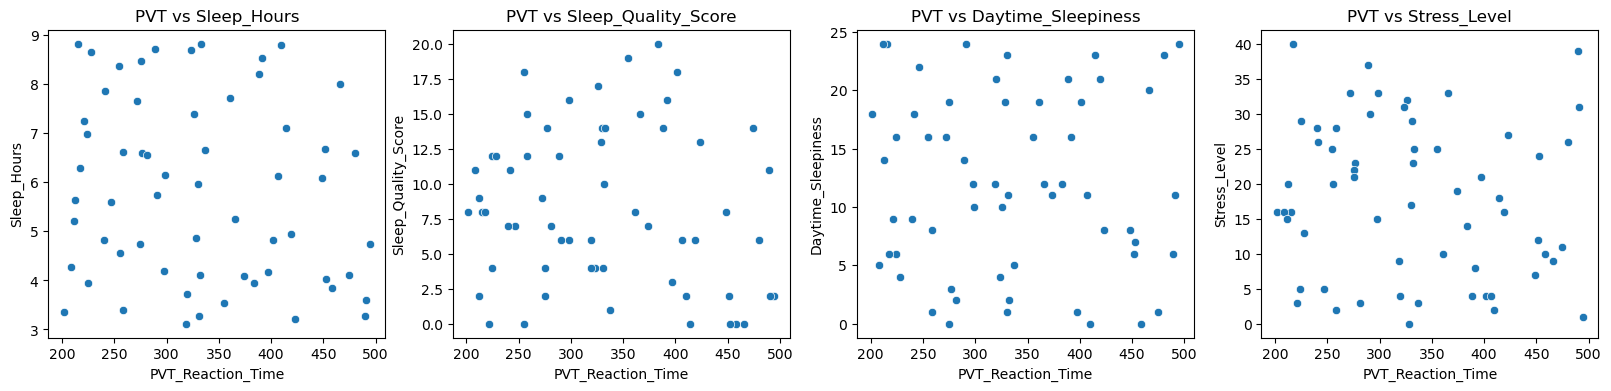

In [203]:
fig, axes = plt.subplots(nrows=1, ncols=len(y), figsize=(5 * len(y), 4))

for i, y_ in enumerate(y):
    sns.scatterplot(data=df, x=x, y=y_, ax=axes[i])
    axes[i].set_title(f'PVT vs {y_}')

## Looking for correlations between all variables - heatmap

In [217]:
df[['Sleep_Hours', 'Sleep_Quality_Score',
       'Daytime_Sleepiness', 'Stroop_Task_Reaction_Time', 'N_Back_Accuracy',
       'Emotion_Regulation_Score', 'PVT_Reaction_Time', 'Age', 'BMI',
       'Caffeine_Intake', 'Physical_Activity_Level', 'Stress_Level']].corr()

,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
Sleep_Hours,1.000000,0.013907,0.131855,0.056203,-0.110396,-0.178629,-0.174171,0.044150,-0.034617,-0.036469,0.153093,-0.020587
Sleep_Quality_Score,0.013907,1.000000,0.024599,0.079965,-0.089971,0.152695,-0.131605,-0.137587,0.203753,-0.062832,-0.019553,0.189843
Daytime_Sleepiness,0.131855,0.024599,1.000000,0.187316,-0.014012,0.034333,-0.034868,-0.058595,-0.010481,0.047691,-0.030218,-0.165486
Stroop_Task_Reaction_Time,0.056203,0.079965,0.187316,1.000000,0.012468,0.194503,0.090767,0.077077,0.086004,-0.028332,0.012619,-0.048521
N_Back_Accuracy,-0.110396,-0.089971,-0.014012,0.012468,1.000000,-0.143863,0.104692,-0.013084,0.071775,-0.187181,-0.178366,-0.123392
Emotion_Regulation_Score,-0.178629,0.152695,0.034333,0.194503,-0.143863,1.000000,-0.050701,0.161349,0.042498,0.190747,-0.069069,-0.147983
PVT_Reaction_Time,-0.174171,-0.131605,-0.034868,0.090767,0.104692,-0.050701,1.000000,0.003603,-0.148436,-0.044927,-0.224303,-0.117805
Age,0.044150,-0.137587,-0.058595,0.077077,-0.013084,0.161349,0.003603,1.000000,0.024663,-0.053929,-0.086511,0.045609
BMI,-0.034617,0.203753,-0.010481,0.086004,0.071775,0.042498,-0.148436,0.024663,1.000000,-0.040485,0.019635,0.175338
Caffeine_Intake,-0.036469,-0.062832,0.047691,-0.028332,-0.187181,0.190747,-0.044927,-0.053929,-0.040485,1.000000,0.007481,-0.020900


In [223]:
df_cor = df[['Sleep_Hours', 'Sleep_Quality_Score',
       'Daytime_Sleepiness', 'Stroop_Task_Reaction_Time', 'N_Back_Accuracy',
       'Emotion_Regulation_Score', 'PVT_Reaction_Time', 'Age', 'BMI',
       'Caffeine_Intake', 'Physical_Activity_Level', 'Stress_Level']].corr()

<Axes: >

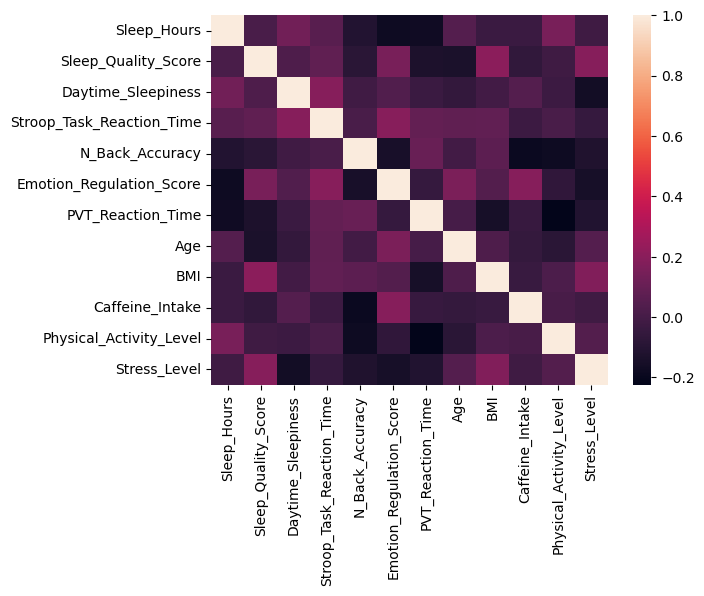

In [227]:
sns.heatmap(df_cor)

# Conclusion

### 60 participants (37 male & 23 female), between the ages of 18 and 43 took part in this experiment, which tested the effect of a number of sleep deprivation factors on cognitive performance. 

### The analysis found no correlation between any of the tested factors and their cognitive test scores, imlying that sleep has no significant effect on cognitive perofmance.